In [1]:
import matplotlib as plt

In [2]:
import lightkurve as lk

In [3]:
search_result = lk.search_lightcurve('AW UMa', author = 'SPOC')

In [4]:
search_result

SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 22 2020   SPOC     120   144376560      0.0
  1 TESS Sector 49 2022   SPOC     120   144376560      0.0

In [5]:
tpf = lk.search_targetpixelfile('AW UMa', sector=49)[0].download()

In [6]:
tpf.interact();

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}


In [7]:
aper = tpf.create_threshold_mask(threshold=3)

In [8]:
lc = tpf.to_lightcurve(aperture_mask=aper)

In [9]:
lc = lc.normalize()

In [10]:
to=52500.03250
period=0.438724980

In [11]:
folded_lc = lc.fold(period, to)

In [12]:
folded_lc = folded_lc.remove_outliers(sigma=2.5);

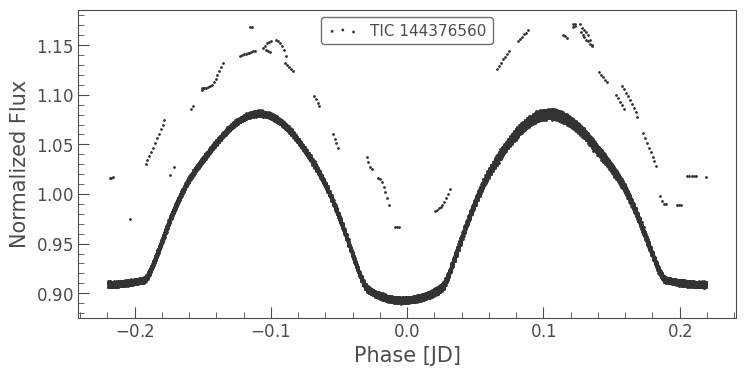

In [13]:
folded_lc.scatter();